In [2]:
# Import libraries 
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
# Load data
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

X = mnist["data"]
y = mnist["target"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
%%time
rf = RandomForestClassifier(max_depth=3, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

Wall time: 8.89 s


0.7274857142857143

In [17]:
%%time
rf = RandomForestClassifier(max_depth=15, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

Wall time: 47.3 s


0.9627428571428571

In [4]:
pca = PCA(n_components = 0.8)
X_reduced = pca.fit_transform(X)

In [9]:
cumsum = np.cumsum(pca.explained_variance_ratio_) 
print("Number of components: " + str(pca.n_components_))

Number of components: 43


In [6]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_reduced, y, random_state=42)

In [7]:
%%time
rf = RandomForestClassifier(max_depth=3, random_state=42)
rf.fit(X_train_pca, y_train_pca)
y_pred_pca = rf.predict(X_test_pca)
accuracy_score(y_test_pca, y_pred_pca)

Wall time: 14.4 s


0.7295428571428572

In [42]:
%%time
rf = RandomForestClassifier(max_depth=15, random_state=42)
rf.fit(X_train_pca, y_train_pca)
y_pred_pca = rf.predict(X_test_pca)
accuracy_score(y_test_pca, y_pred_pca)

Wall time: 50.8 s


0.9438857142857143

In [25]:
print(X.shape)
print(X_reduced.shape)

(70000, 784)
(70000, 43)


#### Conclusion:
During this exercise I took an original dataset with 784 features and used the PCA dimensionality reduction algorithm to reduce the number of features to 43. I provided a threshold of 80% variance to let the algorithm derive a number of principal components that explain the 80% variance. This is where 43 features come from. On the graph below we see how the cumulative sum increases as we incrementaly sum up the components. The curve reaches 80% after adding the 43rd element.

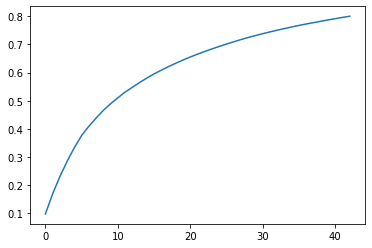

In [12]:
plt.plot(cumsum)